<a href="https://colab.research.google.com/github/Joekr-HaHa/Cat-Dog-Image-Classifier/blob/main/ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Computer Vision

We will use the CIFAR dataset of 32x32 color images, 60,000 images overall, with 6,000 of each class

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Loading the data

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#normalise pixel values to be between 1 and 0
train_images,testimages=train_images/255.0,test_images/255.0

class_names=['airplane','automobile','bird','cat','deer',
             'dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 2s 0us/step


Look at one image

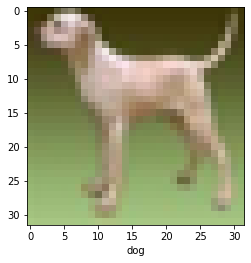

In [ ]:
IMG_INDEX=9999
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# Creating the Model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))#2x2 sample size with stride of 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

Look at the model so far

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


No padding means image reduces by two pixels

#Adding Dense Layers

In [ ]:
model.add(layers.Flatten())#flatten values
model.add(layers.Dense(64,activation='relu'))#neuron layer with 64 nodes
model.add(layers.Dense(10))#output layer with 10 nodes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

#Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5233 - accuracy: 0.4471 - val_loss: 254.1176 - val_accuracy: 0.3855
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1350 - accuracy: 0.5996 - val_loss: 199.2585 - val_accuracy: 0.4435
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9874 - accuracy: 0.6542 - val_loss: 194.8475 - val_accuracy: 0.4676
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8903 - accuracy: 0.6900 - val_loss: 249.8781 - val_accuracy: 0.4285
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8252 - accuracy: 0.7115 - val_loss: 213.9048 - val_accuracy: 0.4543
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7670 - accuracy: 0.7324 - val_loss: 224.4016 - val_accuracy: 0.4669
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7243 - accuracy: 0.7467 - val_lo

#Evaluating

We can determine how well the model performed by looking at it's performace on the test data set.

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 4s - loss: 236.9504 - accuracy: 0.4941
0.49410000443458557


#Working with small datasets

When working with small datsets we can randomly augment the data to avoid overfitting.

**Look into ImageDataGenerator for image transformation**

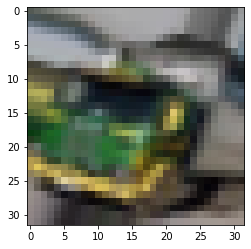

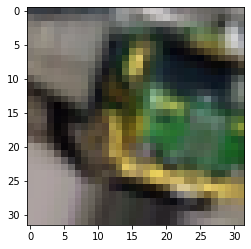

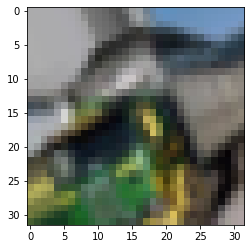

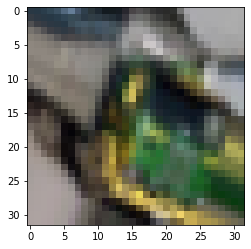

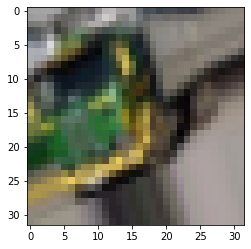

truck


In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator object that transforms images
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#pick an image to transform
test_img=train_images[14]
img=image.img_to_array(test_img)#convert image to numpy array
img=img.reshape((1,)+img.shape)#reshape image

i=0

for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):#this loops forever until we break, saving images to current directory
    plt.figure(i)
    plot=plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i>4:#show 4 images
      break
plt.show()
print(class_names[9])

# **Using a Pretrained Model**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras=tf.keras

# Loading New Dataset

Using cats vs dogs datset

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#split the data manually into 80% training, 10% testing, 10% validation
(raw_train,raw_validation,raw_test),metadata=tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[:90%]'],
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteBXOCJB/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


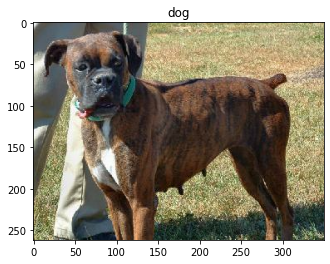

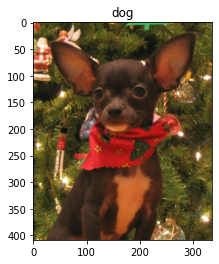

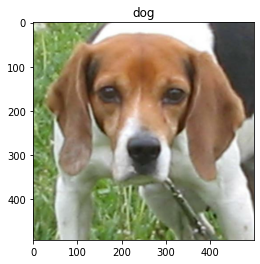

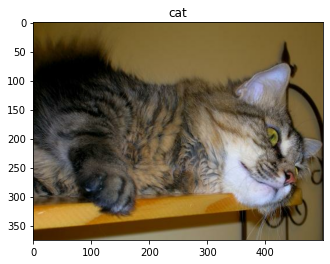

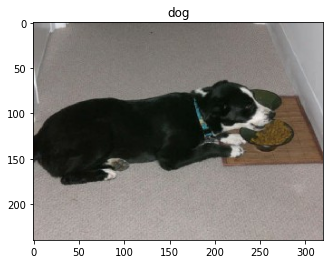

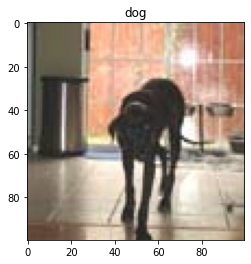

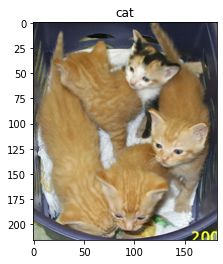

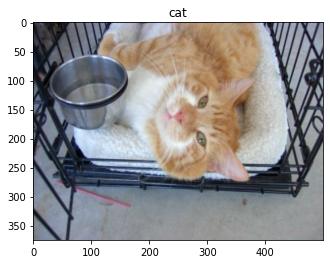

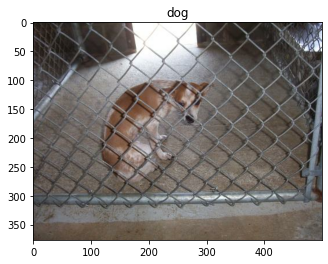

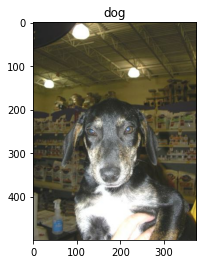

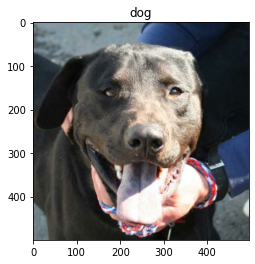

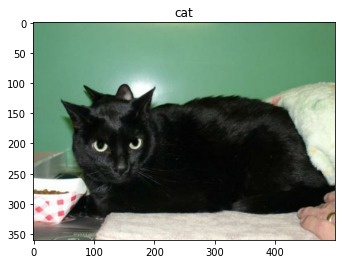

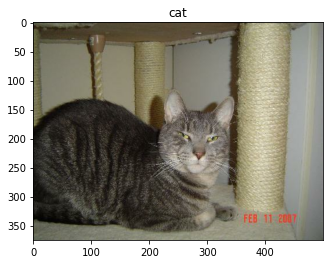

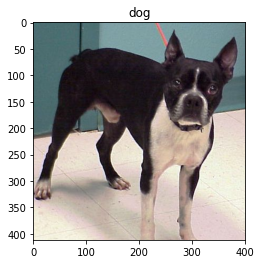

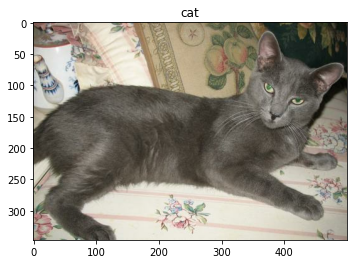

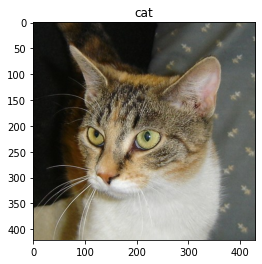

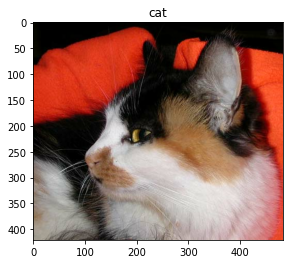

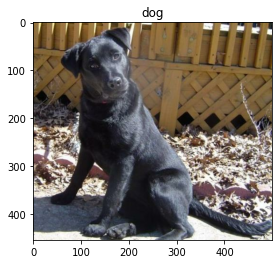

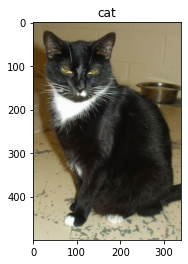

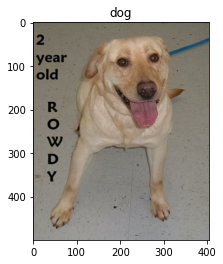

In [ ]:
get_label_name=metadata.features['label'].int2str #create a function object that we can use to get labels

#display 2 images from the dataset
for image, label in raw_train.take(20):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

All the images are currently different sizes

In [ ]:
IMG_SIZE=160 #All images will be resized to 160x160

def format_example(image,label):
  #returns an image that is reshaped to IMG_SIZE
  image=tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  return image,label

Now we can apply this to all images

In [ ]:
train=raw_train.map(format_example)
validation=raw_validation.map(format_example)
test=raw_test.map(format_example)

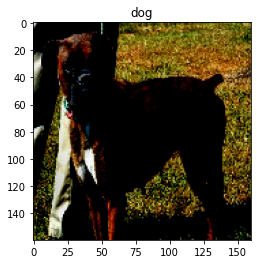

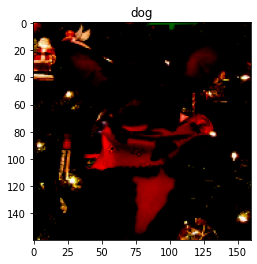

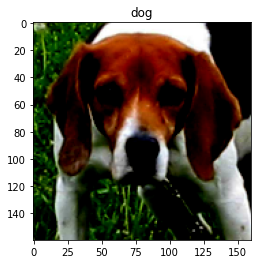

In [ ]:
for image, label in train.take(3):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
BATCH_SIZE=32
SHUFFLE_BUFFER_SIZE=1000

train_batches=train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches=validation.batch(BATCH_SIZE)
test_batches=test.batch(BATCH_SIZE)

# Selecting the Pre Trained Model

In [ ]:
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

#Create the base model from the pretrained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

At this point the base model is simply a tensor of shape (32,5,5,1280) that is a feature extraction of out original (1,160,160,3) image. The 32 means we have 32 layers of different filters/ features.

In [ ]:
for image,_ in train_batches.take(1):
  pass
feature_batch=base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


#Freezing the base

Freezing is disabling the training property of a layer, it means we wont make changes to the weights of any of the layers that are frozen during training. We don't want to change the convolutional base that has already learned weights.

In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

#Adding our Classifier

Averages layers and flattens

In [ ]:
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()

Single dense neuron, as only two classes to predict for.

In [ ]:
prediction_layer=keras.layers.Dense(1)

Combining these layers in a model

In [ ]:
model=tf.keras.Sequential([
                           base_model,
                           global_average_layer,
                           prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


# Training the Model

In [ ]:
base_learning_rate=0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Evaluating the model to see how it does before training on our new images
initial_epochs=3
validation_steps=20

loss0,accuracy0=model.evaluate(validation_batches,steps=validation_steps)

20/20 [==============================] - 11s 574ms/step - loss: 0.6919 - accuracy: 0.5500


In [ ]:
history=model.fit(train_batches,
                  epochs=initial_epochs,
                  validation_data=validation_batches)
acc=history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 400s 687ms/step - loss: 0.1975 - accuracy: 0.9109 - val_loss: 0.0952 - val_accuracy: 0.9600
Epoch 2/3
582/582 [==============================] - 400s 687ms/step - loss: 0.0747 - accuracy: 0.9718 - val_loss: 0.0691 - val_accuracy: 0.9690
Epoch 3/3
582/582 [==============================] - 406s 697ms/step - loss: 0.0598 - accuracy: 0.9775 - val_loss: 0.0598 - val_accuracy: 0.9742
[0.9109081029891968, 0.9717893600463867, 0.9774852395057678]


In [ ]:
model.save("dogs_vs_cats.h5")
new_model=tf.keras.models.load_model("dogs_vs_cats.h5")